# Regressão de Ridge

In [24]:
#Importar todas as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [25]:
#Definir o número de exemplos
M = 100

#Os valores aleatórios gerados serão os mesmos, os resultados poderão ser reproduzidos.
np.random.seed(42)

#As features são criadas, como vetor colune de M linhas, com valores entre -3 e 3. Também crio o ruído (n)
x = np.random.uniform(-3, 3, (M,1))
n = np.random.normal(0, 1, (M, 1))

#A função target é criada sem e com ruído (y e y_noisy)
y = 2 + 1*x + 0.5*x*x
y_noisy = y + n

#Criar os vetores de treinamento e de validação (70% treinamento e 30% validação)
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.3, random_state=10)

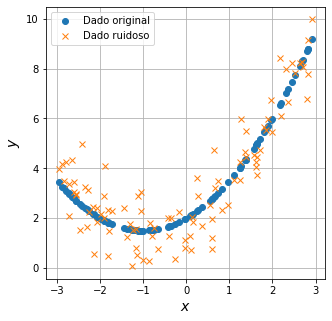

In [26]:
#Gráfico mostrando função objetivo e versão ruidosa
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'o', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [27]:
#Defino a ordem do polinômio
model_order = 90

In [28]:
#Crio vetor de 1000 lambdas variando de 1e^-10 e 1000
lambdas = np.linspace (10**-10, 1, 1000)

In [29]:
#Bias desabilitado
include_bias = True

#Criar vetores para armazenar os valores dos erros de treinamento e validação
error_train = []
error_val = []

minimum_error_val = float("inf")
minimum_val_error_lambda = None
best_iteration = None
best_model = None

#Loop será executado o #lambdas vezes, de acordo com o vetor informado acima.
for i in range(0,len(lambdas)):

    #Instancio o polinômio
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
   
    #Habilito o escalonamento de features
    std_scaler = StandardScaler()
    
    #Habilito a regressão de LASSO para os lambdas informados
    reg = Ridge(alpha=lambdas[i], solver="cholesky")
    
    #Criar o fluxo de ações a serem executadas (criar polinômio, escalonar as features e executar a regularização)
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    
    #O modelo é treinado utilizando a função target 'original' com ruído
    model.fit(x_train, y_train)
    
    #Utilizar o modelo treinado pra fazer predições utilizando o conjunto de validação (erro de validação)
    y_val_regul = model.predict(x_val)
    
    #Utilizar o modelo treinado para fazer predições utilizando o conjunto de treinamento (erro de treinamento)
    y_train_regul = model.predict(x_train)
    
    #Calcular os erros de validação e treinamento, considerando o erro médio entre os valores obtidos
    error_train.append(np.sqrt(mean_squared_error(y_train, y_train_regul)))
    error_val.append(np.sqrt(mean_squared_error(y_val, y_val_regul)))
    
    #Armazeno o menor valor de erro, o ótimo valor de lambda, a melhor iteração e o melhor modelo
    if error_val[i] < minimum_error_val:
        minimum_error_val = error_val[i]
        minimum_error_val_lambda = lambdas[i]
        best_iteration = i
        best_model = clone(model)

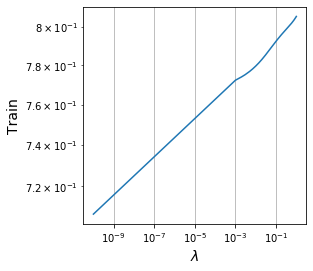

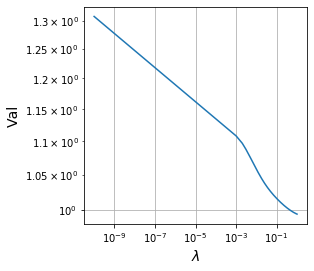

In [30]:
#configuro o gráfico a ser exibido (lambda vs. erro)
fig = plt.figure(figsize=(4,4))
plt.plot(lambdas, error_train)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('Train', fontsize=14)
plt.grid()

fig = plt.figure(figsize=(4,4))
plt.plot(lambdas, error_val)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('Val', fontsize=14)
plt.grid()

In [31]:
#Menor erro de validação e valor ótimo de lambda
print('Menor erro de validação = ', minimum_error_val)
print('Valor ótimo de lambda = ',  minimum_error_val_lambda)

Menor erro de validação =  0.993997188514725
Valor ótimo de lambda =  1.0


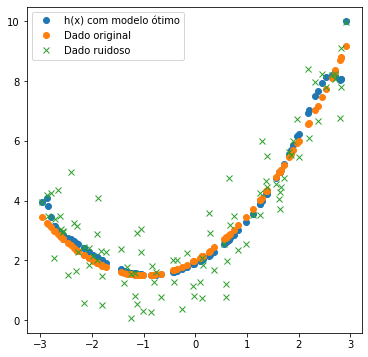

In [32]:
#Utilizo o modelo ótimo para criar gráfico que mostra função hipótese
best_model.fit(x_train, y_train)
yhat = best_model.predict(x)


fig = plt.figure(figsize=(6,6))
plt.plot(x, yhat, 'o', label='h(x) com modelo ótimo')
plt.plot(x, y, 'o', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.legend()

In [33]:
#Pesos obtidos durante o treinamento

best_ridge_weights = best_model.named_steps.reg.coef_

In [34]:
print('Pesos encontrados durante o treinamento do modelo com o menor erro de validação')
print(best_ridge_weights)

Pesos encontrados durante o treinamento do modelo com o menor erro de validação
[[ 0.00000000e+00  1.55288255e+00  1.41595431e+00  2.37421122e-01
   4.66050959e-01  1.21513589e-01  4.30098819e-02  9.33210077e-02
  -1.31307230e-01  3.03739145e-02 -1.86317248e-01 -3.75534691e-02
  -1.84614431e-01 -8.84730765e-02 -1.57663355e-01 -1.17319088e-01
  -1.21647367e-01 -1.27124376e-01 -8.47340840e-02 -1.23151499e-01
  -5.07925273e-02 -1.10381019e-01 -2.14121881e-02 -9.27418635e-02
   2.99111990e-03 -7.30578655e-02  2.25777539e-02 -5.32301564e-02
   3.77677826e-02 -3.44607908e-02  4.90772801e-02 -1.74501263e-02
   5.70362551e-02 -2.55178880e-03  6.21495167e-02  1.01124531e-02
   6.48797362e-02  2.05703521e-02  6.56417274e-02  2.89415250e-02
   6.48022150e-02  3.53978483e-02  6.26821484e-02  4.01367740e-02
   5.95600829e-02  4.33637515e-02  5.56759114e-02  4.52809873e-02
   5.12346067e-02  4.60805679e-02  4.64098287e-02  4.59405450e-02
   4.13473316e-02  4.50230048e-02  3.61681504e-02  4.34734398e

In [35]:
'''
Ao utilizar a regressão de RIDGE, observa-se que há apenas um peso de valor nulo (diferentemente do que acontece ao
utilizar a regressão de LASSO.). Nesse caso (RIDGE), não ocorre a seleção de variáveis, como ocorre em LASSO, e os 
pesos são 'reduzidos' ao invés de zerados.
'''

"\nAo utilizar a regressão de RIDGE, observa-se que há apenas um peso de valor nulo (diferentemente do que acontece ao\nutilizar a regressão de LASSO.). Nesse caso (RIDGE), não ocorre a seleção de variáveis, como ocorre em LASSO, e os \npesos são 'reduzidos' ao invés de zerados.\n"